# **Import Libraries**

In [42]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# **Load Model and Dataset**

In [43]:
# Load Model with custom objects
g_model = load_model("Models\Pixel[02]_Context[08]\g_model_epoch_000368.h5")

In [44]:
# Load and resize the image
img = load_img("Dataset_org/CUHK/Testing sketch/f1-001-01-sz1.jpg", target_size=(256, 256))
target = cv2.cvtColor(cv2.imread("Dataset_org/CUHK/Testing photo/f1-001-01.jpg"), cv2.COLOR_BGR2RGB)

# **Generate Images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step


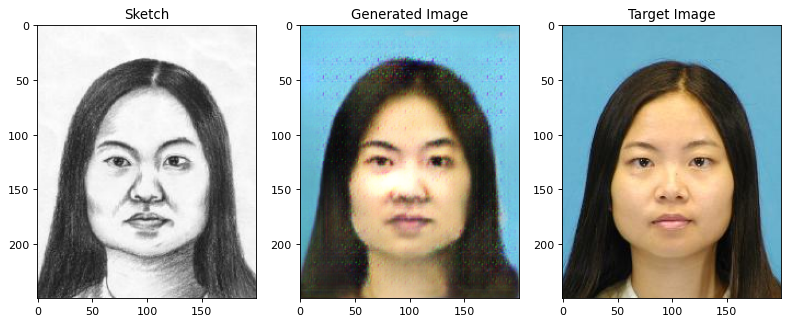

In [45]:
# Convert to numpy array
img = img_to_array(img)
norm_img = (img.copy() - 127.5) / 127.5

# Generate image from model
g_img = g_model.predict(np.expand_dims(norm_img, 0))[0]
g_img = (g_img + 1) * 127.5  # Normalize [-1,1]

# Resize images for visualization
img = cv2.resize(img, (200, 250))
g_img = cv2.resize(g_img, (200, 250))

# Convert grayscale to RGB for visualization
if g_img.shape[-1] == 1:
    g_img = np.squeeze(g_img)  # Remove single-dimensional entry
    g_img = cv2.resize(g_img, (200, 250))
    g_img = cv2.cvtColor(g_img, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB

target = cv2.resize(target, (200, 250))

# Plot images
fig = plt.figure(num=None, figsize=(12, 6), dpi=80)
ax1 = fig.add_subplot(1, 3, 1)
plt.imshow(img.astype('uint8'))
ax1.set_title('Sketch')

ax2 = fig.add_subplot(1, 3, 2)
plt.imshow(g_img.astype('uint8'))
ax2.set_title('Generated Image')

ax3 = fig.add_subplot(1, 3, 3)
plt.imshow(target.astype('uint8'))
ax3.set_title('Target Image')

plt.show()
